In [99]:
'''
This code snippet consists of two classes: Cell, which defines a single cell within a maze and adds wall within
a cell; Maze, which generates a maze by taking cells as a collection and adds players, coins, enemies, and a start
and an end position.
'''

import random
import numpy as np

# Source:
# https://scipython.com/blog/making-a-maze/

class Cell:
    """A cell in the maze.

    A maze "Cell" is a point in the grid which may be surrounded by walls to
    the north, east, south or west.

    """

    # A wall separates a pair of cells in the N-S or W-E directions.
    wall_pairs = {'N': 'S',
                  'S': 'N',
                  'E': 'W',
                  'W': 'E'}

    def __init__(self, x, y):
        """Initialize the cell at (x,y). At first it is surrounded by walls."""

        self.x, self.y = x, y
        self.walls = {'N': True, 'S': True, 'E': True, 'W': True}

    def has_all_walls(self):
        """Does this cell still have all its walls?"""

        return all(self.walls.values())

    def knock_down_wall(self, other, wall):
        """Knock down the wall between cells self and other."""

        self.walls[wall] = False
        other.walls[Cell.wall_pairs[wall]] = False


class Maze:
    """A Maze, represented as a grid of cells."""

    def __init__(self, nx, ny, nr_of_enemies, nr_of_coins, ix=0, iy=0):
        """Initialize the maze grid.
        The maze consists of nx x ny cells and will be constructed starting
        at the cell indexed at (ix, iy).

        """

        self.nx, self.ny = nx, ny
        self.ix, self.iy = ix, iy
        self.maze_map = [[Cell(x, y) for y in range(ny)] for x in range(nx)]

        self.add_begin_end = False
        self.add_treasure = False
        self.add_enemy = False
        self.add_player = False
        # random.randint(0, self.nx-1), random.randint(0, self.ny-1)
        self.nr_of_enemies = nr_of_enemies
        self.nr_of_coins = nr_of_coins
        self.coin_x = np.random.randint(1, self.nx-1, self.nr_of_coins)
        self.coin_y = np.random.randint(1, self.ny-1, self.nr_of_coins)
        self.enemy_x = np.random.randint(1, self.nx-1, self.nr_of_enemies)
        self.enemy_y = np.random.randint(1, self.ny-1, self.nr_of_enemies)
        self.player_x, self.player_y = 0, 0

        # Give the coordinates of walls that you do *not* wish to be
        # present in the output here.
        self.excluded_walls = [((nx-1, ny), (nx, ny)),
                               ((0, 0), (0, 1))]

    def cell_at(self, x, y):
        """Return the Cell object at (x,y)."""

        return self.maze_map[x][y]

    def __str__(self):
        """Return a (crude) string representation of the maze."""

        maze_rows = ['-' * self.nx * 2]
        for y in range(self.ny):
            maze_row = ['|']
            for x in range(self.nx):
                if self.maze_map[x][y].walls['E']:
                    maze_row.append(' |')
                else:
                    maze_row.append('  ')
            maze_rows.append(''.join(maze_row))
            maze_row = ['|']
            for x in range(self.nx):
                if self.maze_map[x][y].walls['S']:
                    maze_row.append('-+')
                else:
                    maze_row.append(' +')
            maze_rows.append(''.join(maze_row))
        return '\n'.join(maze_rows)

    def find_valid_neighbours(self, cell):
        """Return a list of unvisited neighbours to cell."""

        delta = [('W', (-1, 0)),
                 ('E', (1, 0)),
                 ('S', (0, 1)),
                 ('N', (0, -1))]
        neighbours = []
        for direction, (dx, dy) in delta:
            x2, y2 = cell.x + dx, cell.y + dy
            if (0 <= x2 < self.nx) and (0 <= y2 < self.ny):
                neighbour = self.cell_at(x2, y2)
                if neighbour.has_all_walls():
                    neighbours.append((direction, neighbour))
        return neighbours

    def make_maze(self):
        # Total number of cells.
        n = self.nx * self.ny
        cell_stack = []
        current_cell = self.cell_at(self.ix, self.iy)
        # Total number of visited cells during maze construction.
        nv = 1

        while nv < n:
            neighbours = self.find_valid_neighbours(current_cell)

            if not neighbours:
                # We've reached a dead end: backtrack.
                current_cell = cell_stack.pop()
                continue

            # Choose a random neighbouring cell and move to it.
            direction, next_cell = random.choice(neighbours)
            current_cell.knock_down_wall(next_cell, direction)
            cell_stack.append(current_cell)
            current_cell = next_cell
            nv += 1

In [107]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Node():
    ''' Equivalent to Cell, in context to A* pathfinding algorithm'''
    
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        
        self.g = 0
        self.h = 0
        self.f = 0
    
    def __eq__(self, other):
        return self.position == other.position

def AStar(maze, start, end):
    ''' Returns a list of tuples as a path from the given start to the given end in the maze'''
    
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    
    # Initialise both open and closed list
    open_list = []
    close_list = []
    
    # Add the start node
    open_list.append(start_node)
    
    # Loop until you find the end
    while len(open_list) > 0:
        
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumaerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        
        # Pop current off open list; Add onto closed list
        open_list.pop(current_index)
        closed_list.append(current_index)
        
        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]    # Return reversed path
    
    # Generate children
    children = []
    for new_position in [(0,-1), (0,1), (-1,0), (1,0), (-1,-1), (-1,1), (1,-1), (1,1)]:
        
        # Get node position
        node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
        
        # Ensure within range
        if node_position[0] > (len(maze) - 1) or node_position < 0 or node_position[1] > (len(maze[len(maze)-1])-1) or node_position[1] < 0:
            continue
        
        # Ensure walkable terrain
        if maze[node_position[0]][node_position[1]] != 0:
            continue
        
        # Create new node
        new_node = Node(current_node, node_position)
        
        # Append
        children.append(new_node)
    
    # Loop through children
    for child in children:
        
        # Child is on the closed list
        for closed_child in closed_List:
            if child == closed_child:
                continue
        
        # Create the f, g, and h values
        for open_node in open_list:
            if child == open_node and child.g > open_node.g:
                continue
        
        # Add the child to the open list
        open_list.append(child)

class Player(Maze):
    ''' This class models the player to three player profiles: Greedy, Neutral, Aggresive.
    Their respective definitions are:
    1. Greedy: Aims to achieve all coins, without much consideration to beating all enemies, and then proceeds to
               the destination.
    2. Neutral: Aims to proceed to the destination without considering coins and/or enemies in the path.
    3. Aggresive: Aims to beat all enemies, without much consideration of coins, and then proceeds to the 
                  destination.'''
    
    def __init__(self, player_type, pathfinding_algorithm, maze):
        super().__init__(maze.nx, maze.ny, maze.nr_of_enemies, maze.nr_of_coins, ix=0, iy=0)
        self.player_type = player_type
        self.pathfinding_algorithm = pathfinding_algorithm
    
    def pathfinding(self, pathfinding_algorithm):
        player_x, player_y = 0, 0
        if self.pathfinding_algorithm == 'AStar':
            path = AStar(maze, (ix, iy), (maze.nx-1, maze.ny-1))
        elif self.pathfinding_algorithm == 'DFS':
            pass
        elif self.pathfinding_algorithm == 'BFS':
            pass
    
    def gameplay(self, player_type):
        if self.player_type == 'Greedy':
            pass
        elif self.player_type == 'Neutral':
            pass
        elif self.player_type == 'Aggresive':
            pass
        
        if self.player_x in self.coin_x and self.player_y in self.coin_y:
            pass
        elif self.player_x in self.enemy_x and self.player_y in self.enemy_y:
            pass
        
    
    def visualise(self):
        fig, ax = plt.subplots()
        top_text = ax.text(0.5, 0.95, '', ha='center', va='top', transform=ax.transAxes, fontsize=12, color='black')
        bottom_text = ax.text(0.5, 0.05, '', ha='center', va='bottom', transform=ax.transAxes, fontsize=12, color='black')
        num_iterations = 10
        coins_collected = 0
        enemies_faced = 0
        steps_taken = 0

        def update_iteration(frame):
            nonlocal coins_collected, enemies_faced, steps_taken
            coins_collected += 1
            enemies_faced += 1
            steps_taken += 1

            top_text.set_text('Maze design for a %s player' % self.player_type.upper())
            bottom_text.set_text('Coins = %d   Enemies = %d    Steps = %d' % (coins_collected, enemies_faced, steps_taken))

        def init():
            top_text.set_text('')
            bottom_text.set_text('')
            return top_text, bottom_text

        def animate(frame):
            update_iteration(frame)
            return top_text, bottom_text

        animation = FuncAnimation(fig, animate, frames=range(num_iterations), init_func=init, interval=2000, blit=True)
        ax.set_xticks([])
        ax.set_yticks([])
        top_text.set_text('Maze design for a %s player' % self.player_type.upper())
        bottom_text.set_text('Coins = %d   Enemies = %d    Steps = %d' % (coins_collected, enemies_faced, steps_taken))
        plt.show()


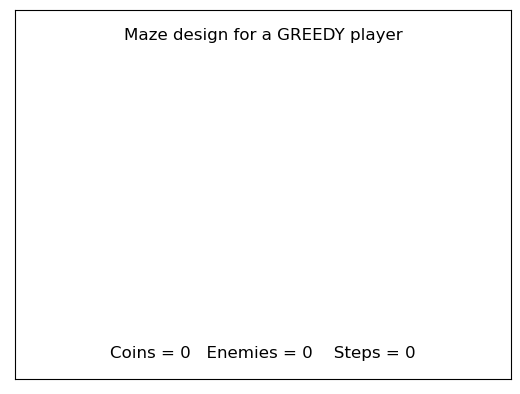

In [108]:
#from df_maze import Maze

# Maze dimensions (ncols, nrows)
nx, ny = 5, 5
# Maze entry position
ix, iy = 0, 0

maze = Maze(nx, ny, 2, 2, ix, iy)
maze.add_begin_end = True
maze.add_treasure = True
maze.add_enemy = True
maze.add_player = True
maze.make_maze()

player = Player('Greedy', 'AStar', maze)
#print(player.pathfinding.path)
player.visualise()